In [20]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# 데이터 선택

In [ ]:
x = np.load('./data/x.npy')
x = np.load('./data/x_percentile.npy')
x = np.load('./data/x_standard.npy'')
x = np.load('./data/x_try.npy'')
x = np.load('./data/x_robust.npy')

## 데이터 읽기

- **y** 는 LabelEncoder를 적용한 라벨 **숫자** 데이터
- **yy** 는 글자로 지정된 라벨 **문자** 데이터
- **pred** 는 만들어진 모델에 적용할 테스트(test) 데이터

In [21]:
sample_submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

y = np.load('./data/y.npy')
pred = np.load('./data/pred.npy')
yy =pd.read_csv('./data/yy.csv',header=None)

path='./data/column_name.txt'
with open(path,'r')  as f:
    col_name=f.read() 

x_name=col_name.split('\n')
try:
    del(x_name[20])
except:
    pass

# To_categorical

In [22]:
#from keras.utils import to_categorical
#y=to_categorical(y)

# Train_test_Split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, shuffle=True ,random_state=0)

# Modeling
- 1. RandomForestClassifier
- 2. LGBMClassifier
- 3. XGBClassifier

`to_categorical` is lowest accuracy

C:\Users\jungg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF accuracy: 81.202


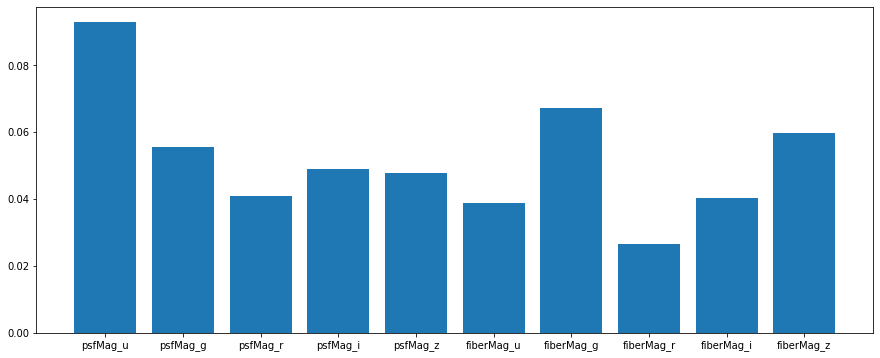

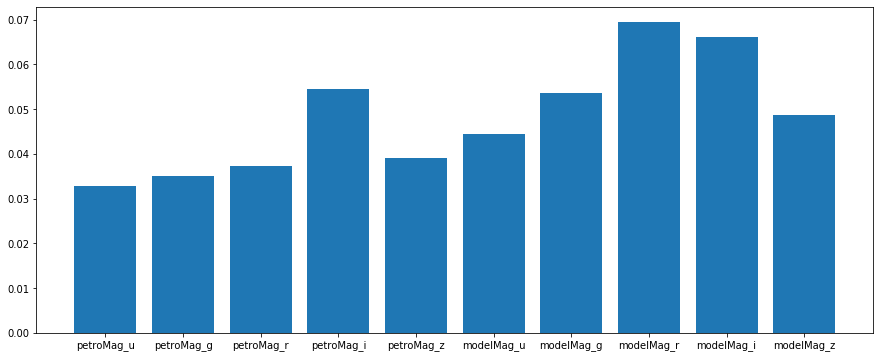

In [24]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
res1=forest.score(x_test, y_test) # Accuracy만 반환
print("RF accuracy: {:.3f}".format(res1*100))

mid=len(x_name)//2

plt.figure(figsize=(15, 6))
plt.bar(x_name[:mid], forest.feature_importances_[:mid])
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(x_name[mid:], forest.feature_importances_[mid:])
plt.show()

In [ ]:
y_pred1 = forest.predict_proba(pred)
# 제출 파일 생성
submission1 = pd.DataFrame(data=y_pred1, columns=sample_submission.columns, index=sample_submission.index)
submission1.to_csv('./data/submission_data_1.csv', index=True)

In [ ]:
LGBM = LGBMClassifier()

eval_set = [(x_test, y_test)]
LGBM.fit(x_train, y_train, eval_metric="mlogloss", eval_set=eval_set, verbose=True,early_stopping_rounds=50)
res2=LGBM.score(x_test, y_test)
print("LGBM accuracy: {:.3f}".format(res2*100))
from lightgbm import plot_importance
plot_importance(LGBM)

In [ ]:
y_pred2 = LGBM.predict_proba(pred)
# 제출 파일 생성
submission2 = pd.DataFrame(data=y_pred2, columns=sample_submission.columns, index=sample_submission.index)
submission2.to_csv('./data/submission_data_2.csv', index=True)

In [ ]:
XGB = XGBClassifier()

eval_set = [(x_test, y_test)]
XGB.fit(x_train, y_train, eval_metric="mlogloss", eval_set=eval_set, verbose=True,early_stopping_rounds=50)
res3=XGB.score(x_test, y_test)
print("XGB accuracy: {:.3f}".format(res3*100))
from xgboost import plot_importance
plot_importance(XGB)

In [ ]:
y_pred3 = XGB.predict_proba(pred)
# 제출 파일 생성
submission3 = pd.DataFrame(data=y_pred3, columns=sample_submission.columns, index=sample_submission.index)
submission3.to_csv('./data/submission_data_3.csv', index=True)